## Quantitative Analysis / Quant Methods Applications


In [56]:
# Install the yfinance module
import yfinance as yf
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 

In [42]:
bto = yf.Ticker("BZ=F")
clf = yf.Ticker("CL=F")
coaca = yf.Ticker("CC=F")
sugar = yf.Ticker("SB=F")
spy = yf.Ticker("SPY")
kmx = yf.Ticker("KMX")


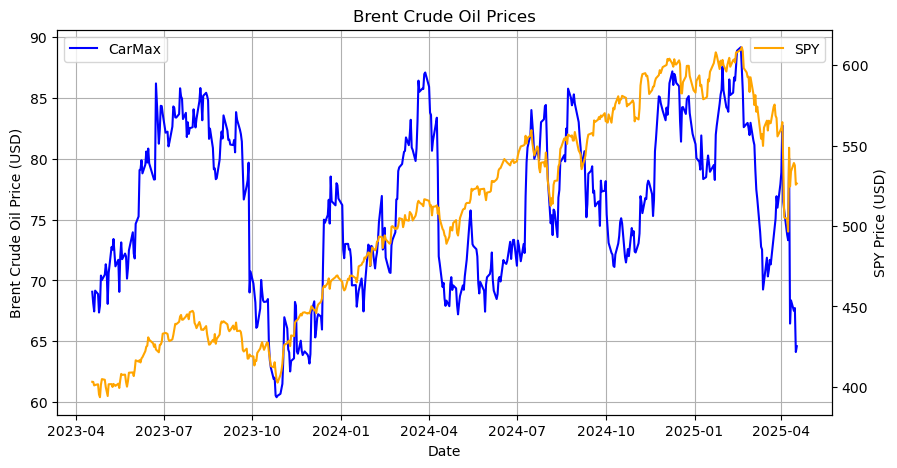

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))  # Create a figure and axes
ax2 = ax.twinx()  # Create a twin axes sharing the x-axis

ax.set_title("Brent Crude Oil Prices")
ax.set_xlabel("Date")
ax.set_ylabel("Brent Crude Oil Price (USD)")
ax2.set_ylabel("SPY Price (USD)")

ax.grid()
ax.plot(kmx.history(period="2y")["Close"], label="CarMax", color='blue')
ax2.plot(spy.history(period="2y")["Close"], label="SPY", color='orange')

ax.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()